In [2]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from nltk.stem.porter import PorterStemmer

In [6]:
df=pd.read_csv("C:/Users/dheer/Desktop/flowers/spam.csv", encoding = 'latin-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
df.drop(labels=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


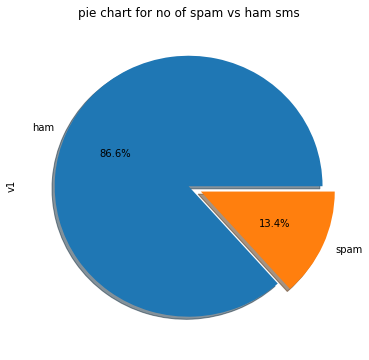

In [17]:
df['v1'].value_counts().plot(kind='pie',explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.title("pie chart for no of spam vs ham sms")
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
#ham=0
#spam=1
le=LabelEncoder()
df['v1']=le.fit_transform(df['v1'])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
pd.isnull(df).sum()

v1    0
v2    0
dtype: int64

In [22]:
#stem 1 remove stopwords and stem it
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

In [27]:
def cleanText(df1):
    
    df1 = df1.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in df1.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

df["v2"] = df["v2"].apply(cleanText)
df.head()   

,v1,v2
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkts 2...
3,0,u dun say ear hor u c alreadi say
4,0,nah dont think goe usf live around though


In [29]:
x=df["v2"]
x.shape

(5572,)

In [30]:
y=df["v1"]
y.shape

(5572,)

In [31]:
from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
#x_tr.shape
print(y_tr.shape,x_tr.shape,x_test.shape)


(3900,) (3900,) (1672,)


In [32]:
bow=CountVectorizer()
x_tr=bow.fit_transform(x_tr)
x_tr

<3900x6557 sparse matrix of type '<class 'numpy.int64'>'
	with 32563 stored elements in Compressed Sparse Row format>

In [33]:
x_test=bow.transform(x_test)
x_test.shape

(1672, 6557)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV 
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
#data=load_breast_cancer()
tuned_para=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
#x_tr,x_test,y_tr,y_test=train_test_split(data.data,data.target,test_size=0.5,random_state=0)
model=GridSearchCV(LogisticRegression(),tuned_para,scoring='accuracy')
model.fit(x_tr,y_tr)
print(model.best_estimator_)
print(model.score(x_test,y_test)*100)


C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
98.20574162679426


In [35]:
def k_classfier_brute(x_tr,y_tr):
    mylist=list(range(0,50))

    neighbors=list(filter(lambda x:x%2!=0,mylist))

    cv_scores = []

    for k in neighbors:
        knn=KNeighborsClassifier(n_neighbors=k)
        scores=cross_val_score(knn,x_tr,y_tr,cv=10,scoring='accuracy')
        cv_scores.append(scores.mean())

    MSE=[1-x for x in cv_scores]

    optimal_k=neighbors[MSE.index(min(MSE))]

    print("optimal_k=%d"% optimal_k)

    plt.plot(neighbors,MSE)

    for xy in zip(neighbors,np.round(MSE,3)):
        plt.annotate('(%s,%s)'%xy,xy=xy,textcoords='data')

    plt.xlabel('Number of neighbors K')

    plt.ylabel("Mse errors")

    plt.show() 
    return optimal_k

optimal_k=1


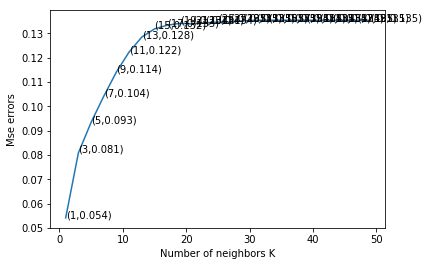

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn import cross_validation
knn_bow=k_classfier_brute(x_tr,y_tr)

In [53]:
k1=KNeighborsClassifier(n_neighbors=1)
k1.fit(x_tr,y_tr)
y_pred=k1.predict(x_test)
print(y_pred[0])
acc1=accuracy_score(y_pred,y_test)
acc1*100


0


94.61722488038278

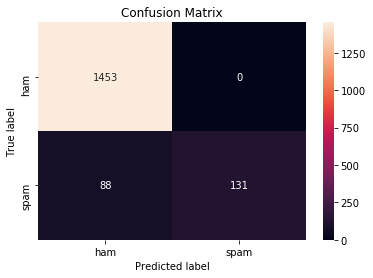

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
class_label=["ham","spam"]
df_cm=pd.DataFrame(cm,index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


In [57]:

from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
#x_tr.shape
print(y_tr.shape,x_tr.shape,x_test.shape)

tf_idf_vect=TfidfVectorizer(ngram_range=(1,2))
x_tr=tf_idf_vect.fit_transform(x_tr)
print(x_tr.shape)
x_test=tf_idf_vect.transform(x_test)
print(x_test.shape)


(3900,) (3900,) (1672,)
(3900, 29589)
(1672, 29589)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV 
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
#data=load_breast_cancer()
tuned_para=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
#x_tr,x_test,y_tr,y_test=train_test_split(data.data,data.target,test_size=0.5,random_state=0)
model=GridSearchCV(LogisticRegression(),tuned_para,scoring='accuracy')
model.fit(x_tr,y_tr)
#print(model.best_estimator_)
print(model.score(x_test,y_test)*100)


98.02631578947368


In [58]:
k1=KNeighborsClassifier(n_neighbors=1)
k1.fit(x_tr,y_tr)
y_pred=k1.predict(x_test)
print(y_pred[0])
acc1=accuracy_score(y_pred,y_test)
acc1*100


0


94.61722488038278